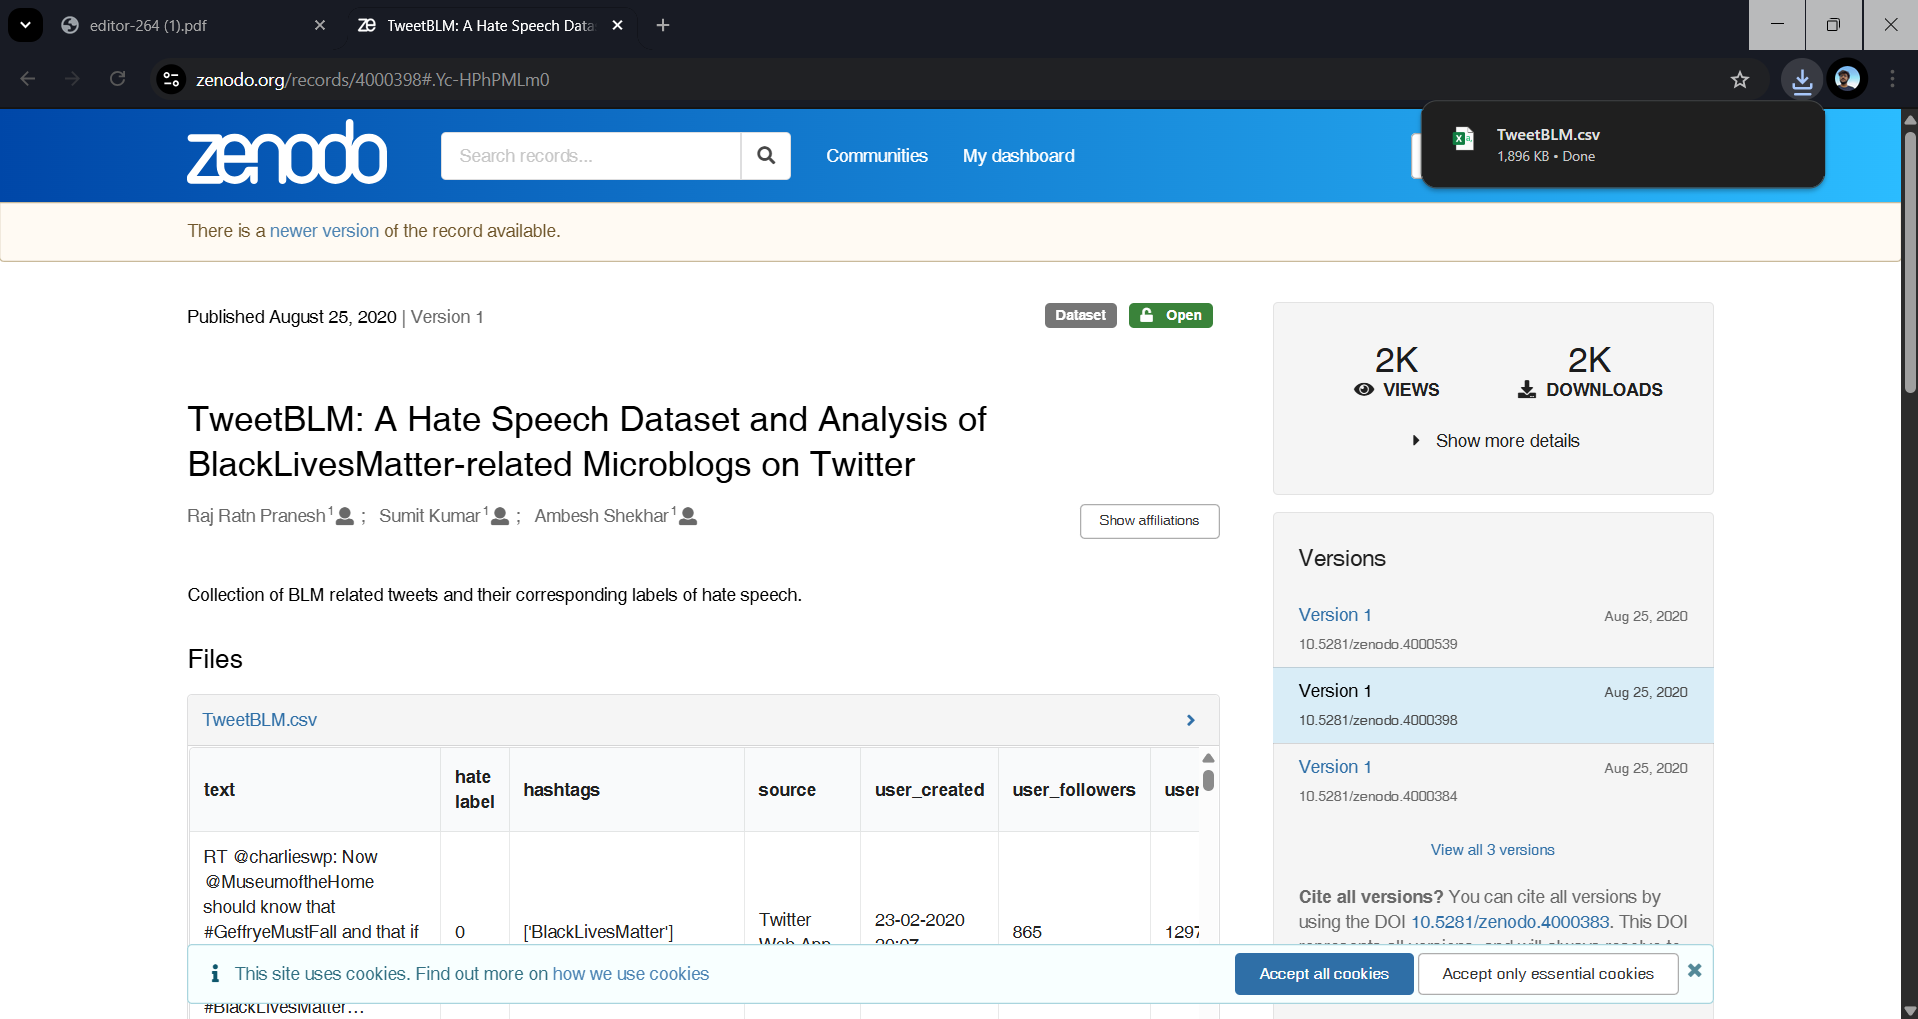

In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import string

In [4]:
import nltk,spacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [8]:
from sklearn.metrics import classification_report

In [9]:
from scipy.sparse import hstack

In [78]:

from sklearn.pipeline import Pipeline

In [83]:
import joblib

In [10]:
df=pd.read_csv('TweetBLM.csv')

In [11]:
df

,text,hate label,hashtags,source,user_created,user_followers,user_friends,user_favourites,is_retweet
0,RT @charlieswp: Now @MuseumoftheHome should kn...,0,['BlackLivesMatter'],Twitter Web App,23-02-2020 20:07,865,1297,33142,False
1,RT @MusicHennessey: Tonight @8pm we interview ...,0,NaN,Twitter for Android,26-06-2011 23:57,1160,397,306702,False
2,RT @hungrybowtie: Some officers advance close ...,0,"['ZimbabweanLivesMatter', 'BlackLivesMatter']",Twitter for iPhone,06-04-2018 05:37,895,668,134398,False
3,He’s not in the WWE HOF because of his skin co...,0,['BlackLivesMatter'],Twitter for iPhone,27-07-2017 01:37,164,32,13317,False
4,@shaunking ...going through it now fighting fo...,0,"['MeToo', 'BLM']",Twitter for iPhone,27-09-2009 19:24,16220,17076,10564,False
...,...,...,...,...,...,...,...,...,...
9160,Watch “Segregated By Design” by @silkworm_stud...,1,NaN,Twitter for Android,01-06-2020 03:27,160,1125,24027,False
9161,"RT @stu_pot_1: #DawnButler to be fair, she’s a...",1,NaN,Twitter Web App,28-10-2018 18:44,1294,1246,6115,False
9162,RT @Tahdahling: #HisLifeMattered Have any of y...,1,NaN,Twitter for Android,23-04-2009 02:19,588,820,4478,False
9163,RT @Kepler186F_IN: Like this whole Niranga sit...,1,['PortlandPolice'],Twitter for iPhone,22-04-2015 17:13,518,593,12907,False


The hashtags and source etc are not important i think

In [12]:
df.drop(columns=['hashtags','source','user_created','user_followers','user_friends','user_favourites','is_retweet'], inplace=True)

In [13]:
df

,text,hate label
0,RT @charlieswp: Now @MuseumoftheHome should kn...,0
1,RT @MusicHennessey: Tonight @8pm we interview ...,0
2,RT @hungrybowtie: Some officers advance close ...,0
3,He’s not in the WWE HOF because of his skin co...,0
4,@shaunking ...going through it now fighting fo...,0
...,...,...
9160,Watch “Segregated By Design” by @silkworm_stud...,1
9161,"RT @stu_pot_1: #DawnButler to be fair, she’s a...",1
9162,RT @Tahdahling: #HisLifeMattered Have any of y...,1
9163,RT @Kepler186F_IN: Like this whole Niranga sit...,1


<Axes: xlabel='hate label'>

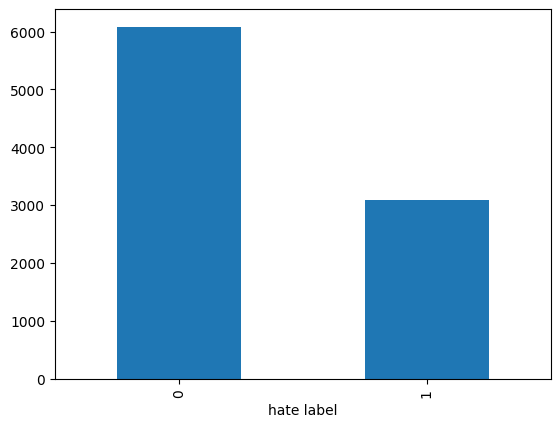

In [14]:
df['hate label'].value_counts().plot(kind='bar')


In [15]:
df.isnull().sum()

text          0
hate label    0
dtype: int64

Performing data cleaning now

[click](https://gauravtanwar1.medium.com/nlp-a-comprehensive-guide-to-text-cleaning-and-preprocessing-63f364febfc5)  article used as reference

1.removing HTML tags

In [16]:
import re

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [17]:
df['text']=df['text'].apply(remove_tags)

In [18]:
df

,text,hate label
0,RT @charlieswp: Now @MuseumoftheHome should kn...,0
1,RT @MusicHennessey: Tonight @8pm we interview ...,0
2,RT @hungrybowtie: Some officers advance close ...,0
3,He’s not in the WWE HOF because of his skin co...,0
4,@shaunking ...going through it now fighting fo...,0
...,...,...
9160,Watch “Segregated By Design” by @silkworm_stud...,1
9161,"RT @stu_pot_1: #DawnButler to be fair, she’s a...",1
9162,RT @Tahdahling: #HisLifeMattered Have any of y...,1
9163,RT @Kepler186F_IN: Like this whole Niranga sit...,1


2. Case standardization

In [19]:
def lower_case(text):
    return text.lower()

In [20]:
df['text']=df['text'].apply(lower_case)

In [21]:
df

,text,hate label
0,rt @charlieswp: now @museumofthehome should kn...,0
1,rt @musichennessey: tonight @8pm we interview ...,0
2,rt @hungrybowtie: some officers advance close ...,0
3,he’s not in the wwe hof because of his skin co...,0
4,@shaunking ...going through it now fighting fo...,0
...,...,...
9160,watch “segregated by design” by @silkworm_stud...,1
9161,"rt @stu_pot_1: #dawnbutler to be fair, she’s a...",1
9162,rt @tahdahling: #hislifemattered have any of y...,1
9163,rt @kepler186f_in: like this whole niranga sit...,1


3.URL

In [22]:
def remove_url(text):
    return re.sub(r'https?://\S+', '', text)


In [23]:
df['text']=df['text'].apply(remove_url)

In [24]:
df

,text,hate label
0,rt @charlieswp: now @museumofthehome should kn...,0
1,rt @musichennessey: tonight @8pm we interview ...,0
2,rt @hungrybowtie: some officers advance close ...,0
3,he’s not in the wwe hof because of his skin co...,0
4,@shaunking ...going through it now fighting fo...,0
...,...,...
9160,watch “segregated by design” by @silkworm_stud...,1
9161,"rt @stu_pot_1: #dawnbutler to be fair, she’s a...",1
9162,rt @tahdahling: #hislifemattered have any of y...,1
9163,rt @kepler186f_in: like this whole niranga sit...,1


4. removing mentions and hashtags

In [25]:
def remove_mentions_and_tags(text):
    text = re.sub(r'@\S*', '', text)
    return re.sub(r'#\S*', '', text)

In [26]:
df['text']=df['text'].apply(remove_mentions_and_tags)

In [27]:
df

,text,hate label
0,rt now should know that and that if they do...,0
1,rt tonight we interview and you can tune i...,0
2,"rt some officers advance close to the crowd, ...",0
3,he’s not in the wwe hof because of his skin co...,0
4,...going through it now fighting for my life ...,0
...,...,...
9160,watch “segregated by design” by on -- watch...,1
9161,"rt to be fair, she’s always known that men i...",1
9162,rt have any of you heard offer condolences?...,1
9163,rt like this whole niranga situation makes me...,1


5. special characters

In [28]:
def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return re.sub(pat, '', text)

In [29]:
df['text']=df['text'].apply(remove_special_characters)

6.removing digits

In [30]:
def remove_numbers(text):
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)
 

In [31]:
df['text']=df['text'].apply(remove_numbers)

7. removing puncuations

In [32]:
def remove_punctuation(text):
    return ''.join([c for c in text if c not in string.punctuation])

In [33]:
df['text']=df['text'].apply(remove_punctuation)

In [34]:
df

,text,hate label
0,rt now should know that and that if they do...,0
1,rt tonight we interview and you can tune i...,0
2,rt some officers advance close to the crowd a...,0
3,hes not in the wwe hof because of his skin col...,0
4,going through it now fighting for my life my ...,0
...,...,...
9160,watch segregated by design by on watch thi...,1
9161,rt to be fair shes always known that men in ...,1
9162,rt have any of you heard offer condolences ...,1
9163,rt like this whole niranga situation makes me...,1


8. lemmetization

In [35]:
def lemmetize(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

In [36]:
df['text']=df['text'].apply(lemmetize)

In [37]:
df

,text,hate label
0,rt now should know that and that if they dont ...,0
1,rt tonight we interview and you can tune in fr...,0
2,rt some officer advance close to the crowd att...,0
3,he not in the wwe hof because of his skin colo...,0
4,going through it now fighting for my life my r...,0
...,...,...
9160,watch segregated by design by on watch this video,1
9161,rt to be fair shes always known that men in un...,1
9162,rt have any of you heard offer condolence is i...,1
9163,rt like this whole niranga situation make me r...,1


9. stop words

In [38]:
def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))

    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if w.lower() not in stop_words]
    
    return ' '.join(filtered_sentence)

In [39]:
df['text']=df['text'].apply(remove_stop_words)

In [40]:
df

,text,hate label
0,rt know dont take others,0
1,rt tonight interview tune pm preorder,0
2,rt officer advance close crowd attempting take...,0
3,wwe hof skin color former wwe wrestler james k...,0
4,going fighting life right reached gotten replyple,0
...,...,...
9160,watch segregated design watch video,1
9161,rt fair shes always known men uniform,1
9162,rt heard offer condolence arm,1
9163,rt like whole niranga situation make retrace d...,1


data cleaning done now moving with text vectorization

1.BOW

In [41]:
X=df['text']
Y=df['hate label']

In [42]:
cv=CountVectorizer()

In [43]:
X=cv.fit_transform(df['text'])

In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

1.LR+BOW

In [45]:
lr_bow=LogisticRegression()

In [46]:
lr_bow.fit(X_train,Y_train)

LogisticRegression()

In [47]:
Y_pred_lr_bow=lr_bow.predict(X_test)

In [48]:
print("Accuracy", lr_bow.score(X_test,Y_test))

Accuracy 0.7424986361156574


In [49]:
pd.DataFrame(classification_report(Y_test,Y_pred_lr_bow,output_dict=True)).T

,precision,recall,f1-score,support
0,0.772234,0.871837,0.819018,1225.000000
1,0.651111,0.481908,0.553875,608.000000
accuracy,0.742499,0.742499,0.742499,0.742499
macro avg,0.711673,0.676872,0.686447,1833.000000
weighted avg,0.732058,0.742499,0.731071,1833.000000


2.RF+BOW

In [50]:
rf_bow=RandomForestClassifier()
rf_bow.fit(X_train,Y_train)
Y_pred_rf_bow=rf_bow.predict(X_test)
print("Accuracy", rf_bow.score(X_test,Y_test))
pd.DataFrame(classification_report(Y_test,Y_pred_rf_bow,output_dict=True)).T

Accuracy 0.7370430987452264


,precision,recall,f1-score,support
0,0.764037,0.877551,0.816869,1225.000000
1,0.647887,0.453947,0.533849,608.000000
accuracy,0.737043,0.737043,0.737043,0.737043
macro avg,0.705962,0.665749,0.675359,1833.000000
weighted avg,0.725511,0.737043,0.722992,1833.000000


3.DT+BOW

In [51]:
dt_bow=DecisionTreeClassifier()
dt_bow.fit(X_train,Y_train)
Y_pred_dt_bow=dt_bow.predict(X_test)
print("Accuracy", dt_bow.score(X_test,Y_test))
pd.DataFrame(classification_report(Y_test,Y_pred_dt_bow,output_dict=True)).T

Accuracy 0.6639388979814512


,precision,recall,f1-score,support
0,0.740711,0.764898,0.752610,1225.000000
1,0.492958,0.460526,0.476190,608.000000
accuracy,0.663939,0.663939,0.663939,0.663939
macro avg,0.616835,0.612712,0.614400,1833.000000
weighted avg,0.658532,0.663939,0.660923,1833.000000


4.KNN+BOW

In [52]:
knn_bow=KNeighborsClassifier()
knn_bow.fit(X_train,Y_train)
Y_pred_knn_bow=knn_bow.predict(X_test)
print("Accuracy", knn_bow.score(X_test,Y_test))
pd.DataFrame(classification_report(Y_test,Y_pred_knn_bow,output_dict=True)).T

Accuracy 0.6710310965630114


,precision,recall,f1-score,support
0,0.692689,0.912653,0.787601,1225.000000
1,0.511416,0.184211,0.270859,608.000000
accuracy,0.671031,0.671031,0.671031,0.671031
macro avg,0.602052,0.548432,0.529230,1833.000000
weighted avg,0.632561,0.671031,0.616199,1833.000000


2.TF-IDF

In [53]:
tfidf=TfidfVectorizer()

In [54]:
X_train,X_test,Y_train,Y_test=train_test_split(df['text'],Y,test_size=0.2,random_state=0)

X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)

1.LR+TFIDF

In [55]:
lr_tfidf=LogisticRegression()
lr_tfidf.fit(X_train_tfidf,Y_train)
Y_pred_lr_tfidf=lr_tfidf.predict(X_test_tfidf)
print("Accuracy", lr_tfidf.score(X_test_tfidf,Y_test))
pd.DataFrame(classification_report(Y_test,Y_pred_lr_tfidf,output_dict=True)).T

Accuracy 0.7479541734860884


,precision,recall,f1-score,support
0,0.753826,0.924898,0.830645,1225.000000
1,0.721212,0.391447,0.507463,608.000000
accuracy,0.747954,0.747954,0.747954,0.747954
macro avg,0.737519,0.658173,0.669054,1833.000000
weighted avg,0.743008,0.747954,0.723447,1833.000000


RF+TFIDF

In [56]:
rf_tfidf=RandomForestClassifier()
rf_tfidf.fit(X_train_tfidf,Y_train)
Y_pred_rf_tfidf=rf_tfidf.predict(X_test_tfidf)
print("Accuracy", rf_tfidf.score(X_test_tfidf,Y_test))
pd.DataFrame(classification_report(Y_test,Y_pred_rf_tfidf,output_dict=True)).T

Accuracy 0.7446808510638298


,precision,recall,f1-score,support
0,0.760137,0.902857,0.825373,1225.000000
1,0.685185,0.425987,0.525355,608.000000
accuracy,0.744681,0.744681,0.744681,0.744681
macro avg,0.722661,0.664422,0.675364,1833.000000
weighted avg,0.735276,0.744681,0.725858,1833.000000


DT+TFIDF

In [57]:
dt_tfidf=DecisionTreeClassifier()
dt_tfidf.fit(X_train_tfidf,Y_train)
Y_pred_dt_tfidf=dt_tfidf.predict(X_test_tfidf)
print("Accuracy", dt_tfidf.score(X_test_tfidf,Y_test))
pd.DataFrame(classification_report(Y_test,Y_pred_dt_tfidf,output_dict=True)).T

Accuracy 0.6819421713038735


,precision,recall,f1-score,support
0,0.755573,0.774694,0.765014,1225.000000
1,0.521664,0.495066,0.508017,608.000000
accuracy,0.681942,0.681942,0.681942,0.681942
macro avg,0.638619,0.634880,0.636515,1833.000000
weighted avg,0.677986,0.681942,0.679769,1833.000000


KNN+TFIDF

In [58]:
knn_tfidf=KNeighborsClassifier()
knn_tfidf.fit(X_train_tfidf,Y_train)
Y_pred_knn_tfidf=knn_tfidf.predict(X_test_tfidf)
print("Accuracy", knn_tfidf.score(X_test_tfidf,Y_test))
pd.DataFrame(classification_report(Y_test,Y_pred_knn_tfidf,output_dict=True)).T

Accuracy 0.6715766503000545


,precision,recall,f1-score,support
0,0.674902,0.981224,0.799734,1225.000000
1,0.557692,0.047697,0.087879,608.000000
accuracy,0.671577,0.671577,0.671577,0.671577
macro avg,0.616297,0.514461,0.443806,1833.000000
weighted avg,0.636024,0.671577,0.563614,1833.000000


okay accuracy was okayish lets now try feature engineering

In [59]:
df

,text,hate label
0,rt know dont take others,0
1,rt tonight interview tune pm preorder,0
2,rt officer advance close crowd attempting take...,0
3,wwe hof skin color former wwe wrestler james k...,0
4,going fighting life right reached gotten replyple,0
...,...,...
9160,watch segregated design watch video,1
9161,rt fair shes always known men uniform,1
9162,rt heard offer condolence arm,1
9163,rt like whole niranga situation make retrace d...,1


Building the below features

1. Average number of words per post

2. Average number of nouns per class

3. Average number of verbs per class

4. Average number of adverbs per class

5. Average number of adjectives per class



In [60]:
def extract_features(text):
    tokens = word_tokenize(text)
    tags = pos_tag(tokens)

    word_count = len(tokens)
    noun_count = sum(1 for word, tag in tags if tag.startswith('NN'))
    verb_count = sum(1 for word, tag in tags if tag.startswith('VB'))
    adv_count  = sum(1 for word, tag in tags if tag.startswith('RB'))
    adj_count  = sum(1 for word, tag in tags if tag.startswith('JJ'))

    return pd.Series({
        'word_count': word_count,
        'noun_count': noun_count,
        'verb_count': verb_count,
        'adv_count': adv_count,
        'adj_count': adj_count
    })

# Apply function to each row in 'text' column
df[['word_count', 'noun_count', 'verb_count', 'adv_count', 'adj_count']] = df['text'].apply(extract_features)


In [61]:
df

,text,hate label,word_count,noun_count,verb_count,adv_count,adj_count
0,rt know dont take others,0,5,3,2,0,0
1,rt tonight interview tune pm preorder,0,6,6,0,0,0
2,rt officer advance close crowd attempting take...,0,9,4,2,0,3
3,wwe hof skin color former wwe wrestler james k...,0,11,8,1,0,2
4,going fighting life right reached gotten replyple,0,7,2,3,1,1
...,...,...,...,...,...,...,...
9160,watch segregated design watch video,1,5,4,1,0,0
9161,rt fair shes always known men uniform,1,7,3,2,1,1
9162,rt heard offer condolence arm,1,5,5,0,0,0
9163,rt like whole niranga situation make retrace d...,1,14,6,2,1,3


In [62]:
cv=CountVectorizer()
X_text=cv.fit_transform(df['text'])

In [63]:
X_num=df[['word_count', 'noun_count', 'verb_count', 'adv_count', 'adj_count']].values

In [64]:
X_final=hstack([X_text, X_num])

In [65]:
Y = df['hate label']

In [66]:
X_train_features, X_test_features, Y_train_features, Y_test_features = train_test_split(X_final, Y, test_size=0.2, random_state=42)


LR+BOW+FEATURES

In [67]:
lr_bow_features=LogisticRegression()
lr_bow_features.fit(X_train_features,Y_train_features)
Y_pred_lr_bow_features=lr_bow_features.predict(X_test_features)
print("Accuracy", lr_bow_features.score(X_test_features,Y_test_features))
pd.DataFrame(classification_report(Y_test_features,Y_pred_lr_bow_features,output_dict=True)).T

Accuracy 0.7266775777414075


c:\Users\Dell\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,precision,recall,f1-score,support
0,0.758297,0.863599,0.807530,1217.000000
1,0.628635,0.456169,0.528692,616.000000
accuracy,0.726678,0.726678,0.726678,0.726678
macro avg,0.693466,0.659884,0.668111,1833.000000
weighted avg,0.714723,0.726678,0.713823,1833.000000


RF+BOW+FEATURES

In [68]:
rf_bow_features=RandomForestClassifier()
rf_bow_features.fit(X_train_features,Y_train_features)
Y_pred_rf_bow_features=rf_bow_features.predict(X_test_features)
print("Accuracy", rf_bow_features.score(X_test_features,Y_test_features))
pd.DataFrame(classification_report(Y_test_features,Y_pred_rf_bow_features,output_dict=True)).T

Accuracy 0.7310420076377523


,precision,recall,f1-score,support
0,0.730573,0.942482,0.823107,1217.000000
1,0.733840,0.313312,0.439135,616.000000
accuracy,0.731042,0.731042,0.731042,0.731042
macro avg,0.732207,0.627897,0.631121,1833.000000
weighted avg,0.731671,0.731042,0.694069,1833.000000


DT+BOW+FEATURES

In [69]:
dt_bow_features=DecisionTreeClassifier()
dt_bow_features.fit(X_train_features,Y_train_features)
Y_pred_dt_bow_features=dt_bow_features.predict(X_test_features)
print("Accuracy", dt_bow_features.score(X_test_features,Y_test_features))
pd.DataFrame(classification_report(Y_test_features,Y_pred_dt_bow_features,output_dict=True)).T

Accuracy 0.6759410801963993


,precision,recall,f1-score,support
0,0.723618,0.828266,0.772414,1217.000000
1,0.525000,0.375000,0.437500,616.000000
accuracy,0.675941,0.675941,0.675941,0.675941
macro avg,0.624309,0.601633,0.604957,1833.000000
weighted avg,0.656870,0.675941,0.659862,1833.000000


KNN+BOW+FEATURES

In [70]:
knn_bow_features=KNeighborsClassifier()
knn_bow_features.fit(X_train_features,Y_train_features)
Y_pred_knn_bow_features=knn_bow_features.predict(X_test_features)
print("Accuracy", knn_bow_features.score(X_test_features,Y_test_features))
pd.DataFrame(classification_report(Y_test_features,Y_pred_knn_bow_features,output_dict=True)).T

Accuracy 0.6617566830332787


,precision,recall,f1-score,support
0,0.707724,0.835661,0.766390,1217.000000
1,0.494949,0.318182,0.387352,616.000000
accuracy,0.661757,0.661757,0.661757,0.661757
macro avg,0.601337,0.576922,0.576871,1833.000000
weighted avg,0.636219,0.661757,0.639010,1833.000000


TFIDF+FEATURES

In [71]:
tfidf=TfidfVectorizer()
X_text_tfidf=tfidf.fit_transform(df['text'])

In [72]:
X_final_tfidf=hstack([X_text_tfidf, X_num])

In [73]:
X_train_features_tfidf, X_test_features_tfidf, Y_train_features_tfidf, Y_test_features_tfidf = train_test_split(X_final_tfidf, Y, test_size=0.2, random_state=42)


LR+TFIDF+FEATURES

In [74]:
lr_tfidf_features=LogisticRegression()
lr_tfidf_features.fit(X_train_features_tfidf,Y_train_features_tfidf)
Y_pred_lr_tfidf_features=lr_tfidf_features.predict(X_test_features_tfidf)
print("Accuracy", lr_tfidf_features.score(X_test_features_tfidf,Y_test_features_tfidf))
pd.DataFrame(classification_report(Y_test_features_tfidf,Y_pred_lr_tfidf_features,output_dict=True)).T

Accuracy 0.723949809056192


c:\Users\Dell\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,precision,recall,f1-score,support
0,0.729800,0.927691,0.816932,1217.00000
1,0.692308,0.321429,0.439024,616.00000
accuracy,0.723950,0.723950,0.723950,0.72395
macro avg,0.711054,0.624560,0.627978,1833.00000
weighted avg,0.717200,0.723950,0.689932,1833.00000


RF+TFIDF+FEATURES

In [75]:
rf_tfidf_features=RandomForestClassifier()
rf_tfidf_features.fit(X_train_features_tfidf,Y_train_features_tfidf)
Y_pred_rf_tfidf_features=rf_tfidf_features.predict(X_test_features_tfidf)
print("Accuracy", rf_tfidf_features.score(X_test_features_tfidf,Y_test_features_tfidf))
pd.DataFrame(classification_report(Y_test_features_tfidf,Y_pred_rf_tfidf_features,output_dict=True)).T

Accuracy 0.7261320240043644


,precision,recall,f1-score,support
0,0.726409,0.942482,0.820458,1217.000000
1,0.724409,0.298701,0.422989,616.000000
accuracy,0.726132,0.726132,0.726132,0.726132
macro avg,0.725409,0.620591,0.621723,1833.000000
weighted avg,0.725737,0.726132,0.686884,1833.000000


DT+TFIDF+FEATURES

In [76]:
dt_tfidf_features=DecisionTreeClassifier()
dt_tfidf_features.fit(X_train_features_tfidf,Y_train_features_tfidf)
Y_pred_dt_tfidf_features=dt_tfidf_features.predict(X_test_features_tfidf)
print("Accuracy", dt_tfidf_features.score(X_test_features_tfidf,Y_test_features_tfidf))
pd.DataFrame(classification_report(Y_test_features_tfidf,Y_pred_dt_tfidf_features,output_dict=True)).T

Accuracy 0.6819421713038735


,precision,recall,f1-score,support
0,0.740152,0.802794,0.770201,1217.000000
1,0.532164,0.443182,0.483614,616.000000
accuracy,0.681942,0.681942,0.681942,0.681942
macro avg,0.636158,0.622988,0.626907,1833.000000
weighted avg,0.670255,0.681942,0.673890,1833.000000


KNN+TFIDF+FEATURES

In [77]:
knn_tfidf_features=KNeighborsClassifier()
knn_tfidf_features.fit(X_train_features_tfidf,Y_train_features_tfidf)
Y_pred_knn_tfidf_features=knn_tfidf_features.predict(X_test_features_tfidf)
print("Accuracy", knn_tfidf_features.score(X_test_features_tfidf,Y_test_features_tfidf))
pd.DataFrame(classification_report(Y_test_features_tfidf,Y_pred_knn_tfidf_features,output_dict=True)).T

Accuracy 0.6170212765957447


,precision,recall,f1-score,support
0,0.681979,0.792933,0.733283,1217.000000
1,0.397129,0.269481,0.321083,616.000000
accuracy,0.617021,0.617021,0.617021,0.617021
macro avg,0.539554,0.531207,0.527183,1833.000000
weighted avg,0.586252,0.617021,0.594758,1833.000000


All models trained now deciding the final model for deployment

LR+TFIDF+NO FEATURES IS BEST

In [79]:
pipe_tfidf_lr=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('lr',LogisticRegression())
])

In [81]:
pipe_tfidf_lr.fit(X_train,Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('lr', LogisticRegression())])

In [82]:
pipe_tfidf_lr.score(X_test,Y_test)

0.7479541734860884

Saving pipeline

In [84]:
pipeline_file=open("hate_speech.pkl","wb")
joblib.dump(pipe_tfidf_lr,pipeline_file)
pipeline_file.close()

In [85]:
example1="People like you are the reason this country is ruined. You don't belong here!"

In [86]:
pipe_tfidf_lr.predict([example1])

array([1], dtype=int64)

In [87]:
example2="I really appreciate how diverse and inclusive this community is. Everyone is welcome here."

In [88]:
pipe_tfidf_lr.predict([example2])

array([0], dtype=int64)

In [89]:
example3="You’re so dumb it’s amazing you can even function."

In [90]:
pipe_tfidf_lr.predict([example3])

array([0], dtype=int64)

In [91]:
example4="Oh sure, blame it on immigrants again. Classic move."
pipe_tfidf_lr.predict([example4])

array([0], dtype=int64)

In [92]:
example5="Get out of here, you worthless piece of trash."
pipe_tfidf_lr.predict([example5])   

array([0], dtype=int64)

In [ ]:
example6="I dont like this country. I will blow it if i had the chance. The government is shit and just burden us with taxes and do not do anything for development. The PM should resign and not step on the throne ever"

In [94]:
pipe_tfidf_lr.predict([example6])  

array([0], dtype=int64)